In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = r"C:\Users\lawre\Downloads\netflix_content_2023.csv"
netflix_data = pd.read_csv(file_path)
pd.set_option('display.max_rows',None)
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [2]:
netflix_data.isnull().sum()

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

In [3]:
#1 Cleaning and Converting 'Hours Viewed' Column to a numeric format
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(',' ,"",regex = True).astype(float)
netflix_data[['Title','Hours Viewed']].head(10)

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0
5,You: Season 4,440600000.0
6,La Reina del Sur: Season 3,429600000.0
7,Outer Banks: Season 3,402500000.0
8,Ginny & Georgia: Season 1,302100000.0
9,FUBAR: Season 1,266200000.0


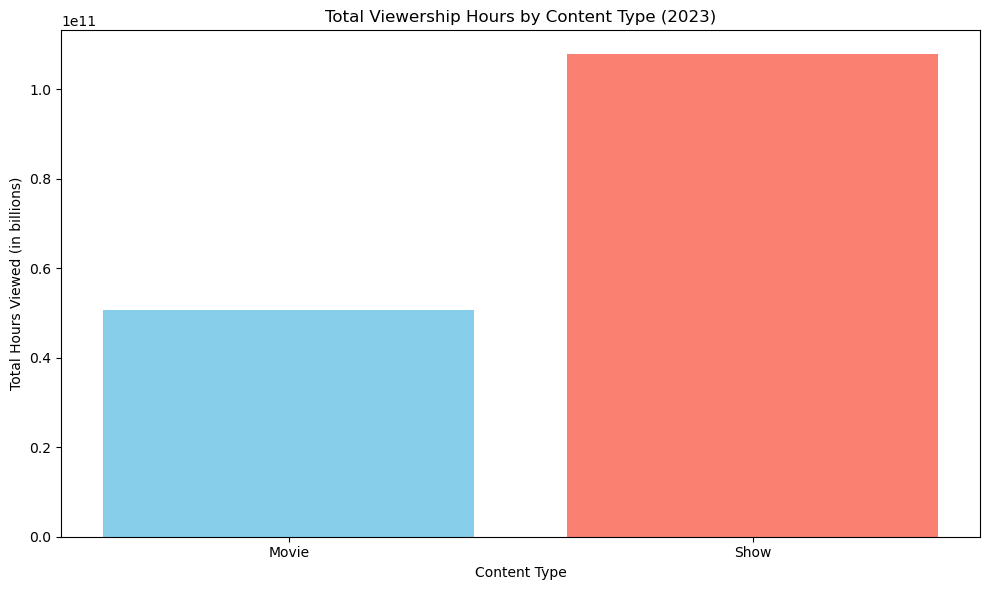

In [4]:
#2.Aggregate viewership hours by content type
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()

# Set colors manually
colors = ['skyblue', 'salmon']

# Create the bar chart
plt.figure(figsize=(10, 6))  # width=10, height=6 in inches
plt.bar(content_type_viewership.index, content_type_viewership.values, color=colors)

# Add title and axis labels
plt.title('Total Viewership Hours by Content Type (2023)')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed (in billions)')

# Optional: Rotate x-axis ticks
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
#The visualization above indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies. 
#This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall

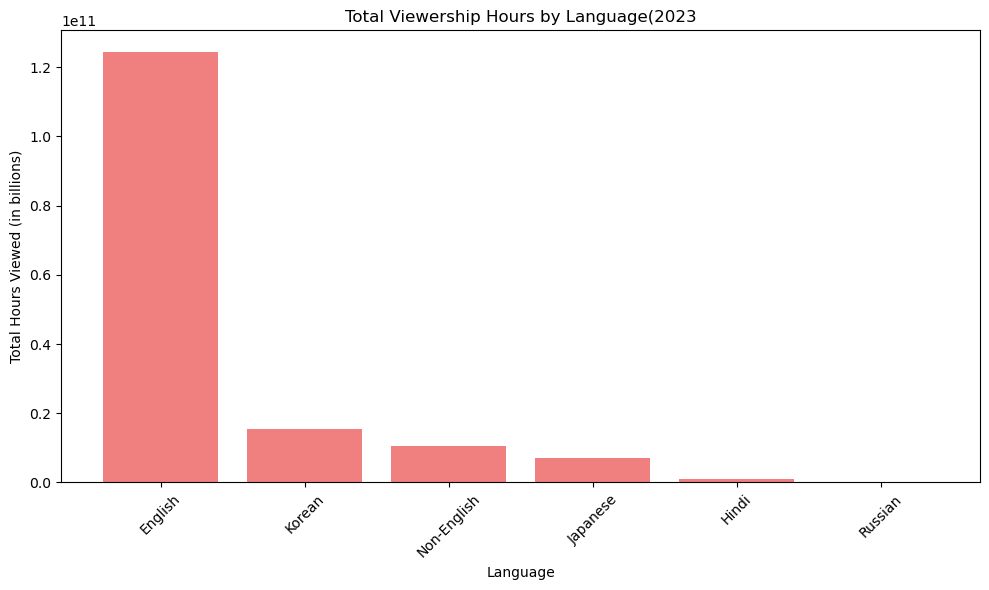

<Figure size 640x480 with 0 Axes>

In [6]:
# 3.aggregate viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending = False)
colors = ['lightcoral']
plt.figure(figsize = (10,6))
plt.bar(language_viewership.index,language_viewership.values,color =colors)
plt.title('Total Viewership Hours by Language(2023')
plt.xlabel('Language')
plt.ylabel('Total Hours Viewed (in billions)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
plt.savefig('my_plot.svg')

In [7]:
#The visualization above reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean. 
#It indicates that Netflix’s primary audience is consuming English content, although non-English shows and
#movies also have a considerable viewership share, which shows a diverse content strategy.

In [8]:
#4.converting the "Release Date" to a datetime format and extract the month
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

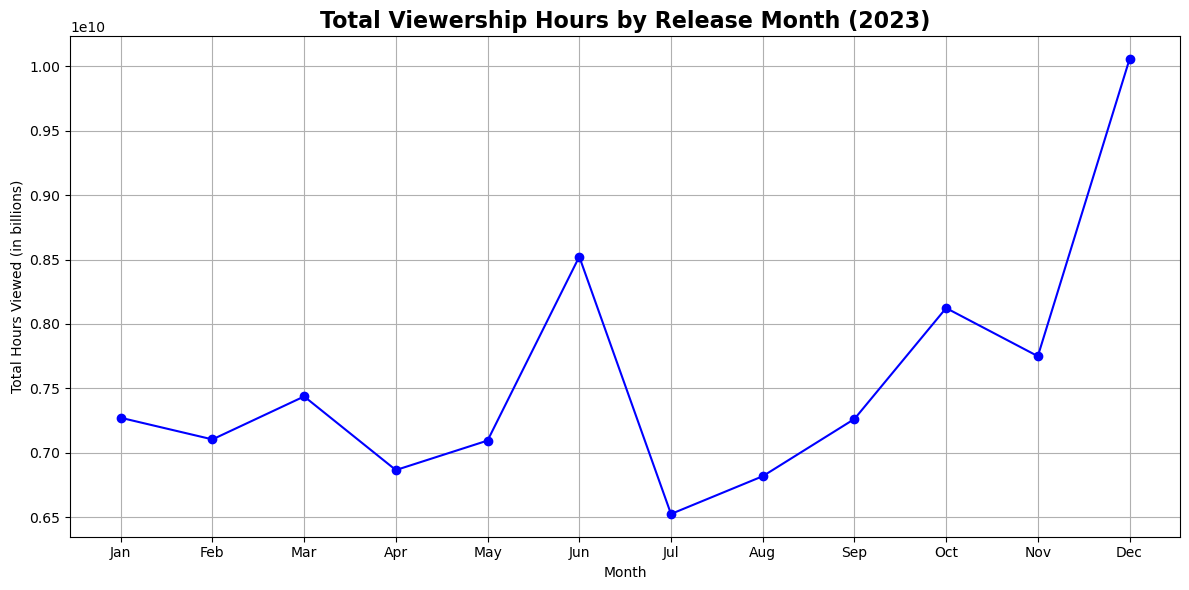

In [26]:
#5.aggregate viewership hours by release month
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()
# Month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_viewership.index, monthly_viewership.values, marker='o', color= 'blue', linestyle='-')
plt.title('Total Viewership Hours by Release Month (2023)', fontsize=16,fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed (in billions)')
plt.xticks(ticks=range(1, 13), labels=months,rotation = 0)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and 
#a sharp rise toward the end of the year in December. 
#It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, 
#while the middle months have a steady but lower viewership pattern.

In [20]:
# extract the top 5 titles based on viewership hours
top_5_titles = netflix_data.nlargest(5,'Hours Viewed')
top_5_titles[['Title','Hours Viewed','Language Indicator','Content Type','Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


In [ ]:
#The Night Agent: Season 1 (English, Show) with 812.1 million hours viewed.
#Ginny & Georgia: Season 2 (English, Show) with 665.1 million hours viewed.
#King the Land: Limited Series (Korean, Movie) with 630.2 million hours viewed.
#The Glory: Season 1 (Korean, Show) with 622.8 million hours viewed.
#ONE PIECE: Season 1 (English, Show) with 541.9 million hours viewed.

#English-language shows dominate the top viewership spots.
#But, Korean content also has a notable presence in the top titles, which indicates its global popularity.

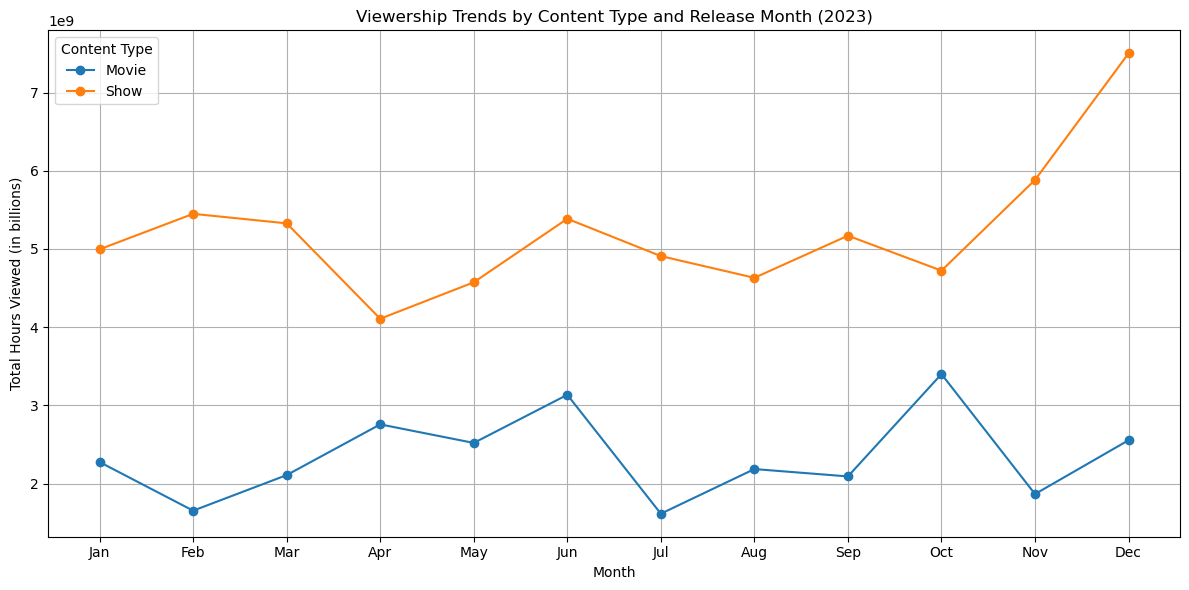

In [25]:
#6. aggregate viewership hours by content type and release month
monthly_viewership_by_type = netflix_data.pivot_table(index='Release Month',
                                                      columns='Content Type',
                                                      values='Hours Viewed',
                                                      aggfunc='sum')

monthly_viewership_by_type.plot(
    figsize=(12, 6),
    marker='o',
    title='Viewership Trends by Content Type and Release Month (2023)'
)

plt.xlabel('Month')
plt.ylabel('Total Hours Viewed (in billions)')
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
            'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.legend(title='Content Type')
plt.grid(True)
plt.tight_layout()
plt.show()



In [1]:
#This is the updated report for 2023 netflix insights